<a href="https://colab.research.google.com/github/amanjeetsahu/Predicting-the-Likelihood-of-E-Signing-a-Loan-Based-on-Financial-History/blob/master/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Likelihood of E-Signing a Loan Based on Financial History

---

# Problem Statement

*Lending companies work by analyzing the financial history of their loan applicant is not, the company then determines the terms of loan. To acquire these applicants, companies can originally receive then through their websites/apps. Often with  the help of advertisement campaigns. Other times, lending companies partner with peer to peer(P2P) lending marketplaces, in order to accquire leads of possible applicants. Some example marketplaces include Upstart, Lending Tree, and Lending club. In this project, we are going to asses the 'quality' of the leads our company receives from these marketplaces.*

- **Market:** The target audience is the set of loan applicants who reached out through an intermediary marketplace.

- **Product:** A Loan

- **Goal:** Develop an model to predict for 'quality' applicants. In this case study, 'quality' applicants are those who reach a key part of the loan process.

# Importing Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', 100) # Show all columns when looking at dataframe
import warnings
warnings.filterwarnings('ignore') # remove warnings from the notebook
import random
import time

# Loading Dataset

In [0]:
dataset = pd.read_csv('https://raw.githubusercontent.com/amanjeetsahu/Predicting-the-Likelihood-of-E-Signing-a-Loan-Based-on-Financial-History/master/P39-Financial-Data.csv')

# Exploratory Data Analysis

## Visualising the Dataset

In [3]:
dataset.head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,1,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0
3,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,1
4,5335819,33,semi-monthly,0,3590,0,5,2,2,8,1,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0


In [4]:
dataset.columns

Index(['entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed'],
      dtype='object')

In [5]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


## Cleaning Data

In [6]:
# Removing NaN
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

*No Nas*

## Plotting Histograms

In [0]:
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])

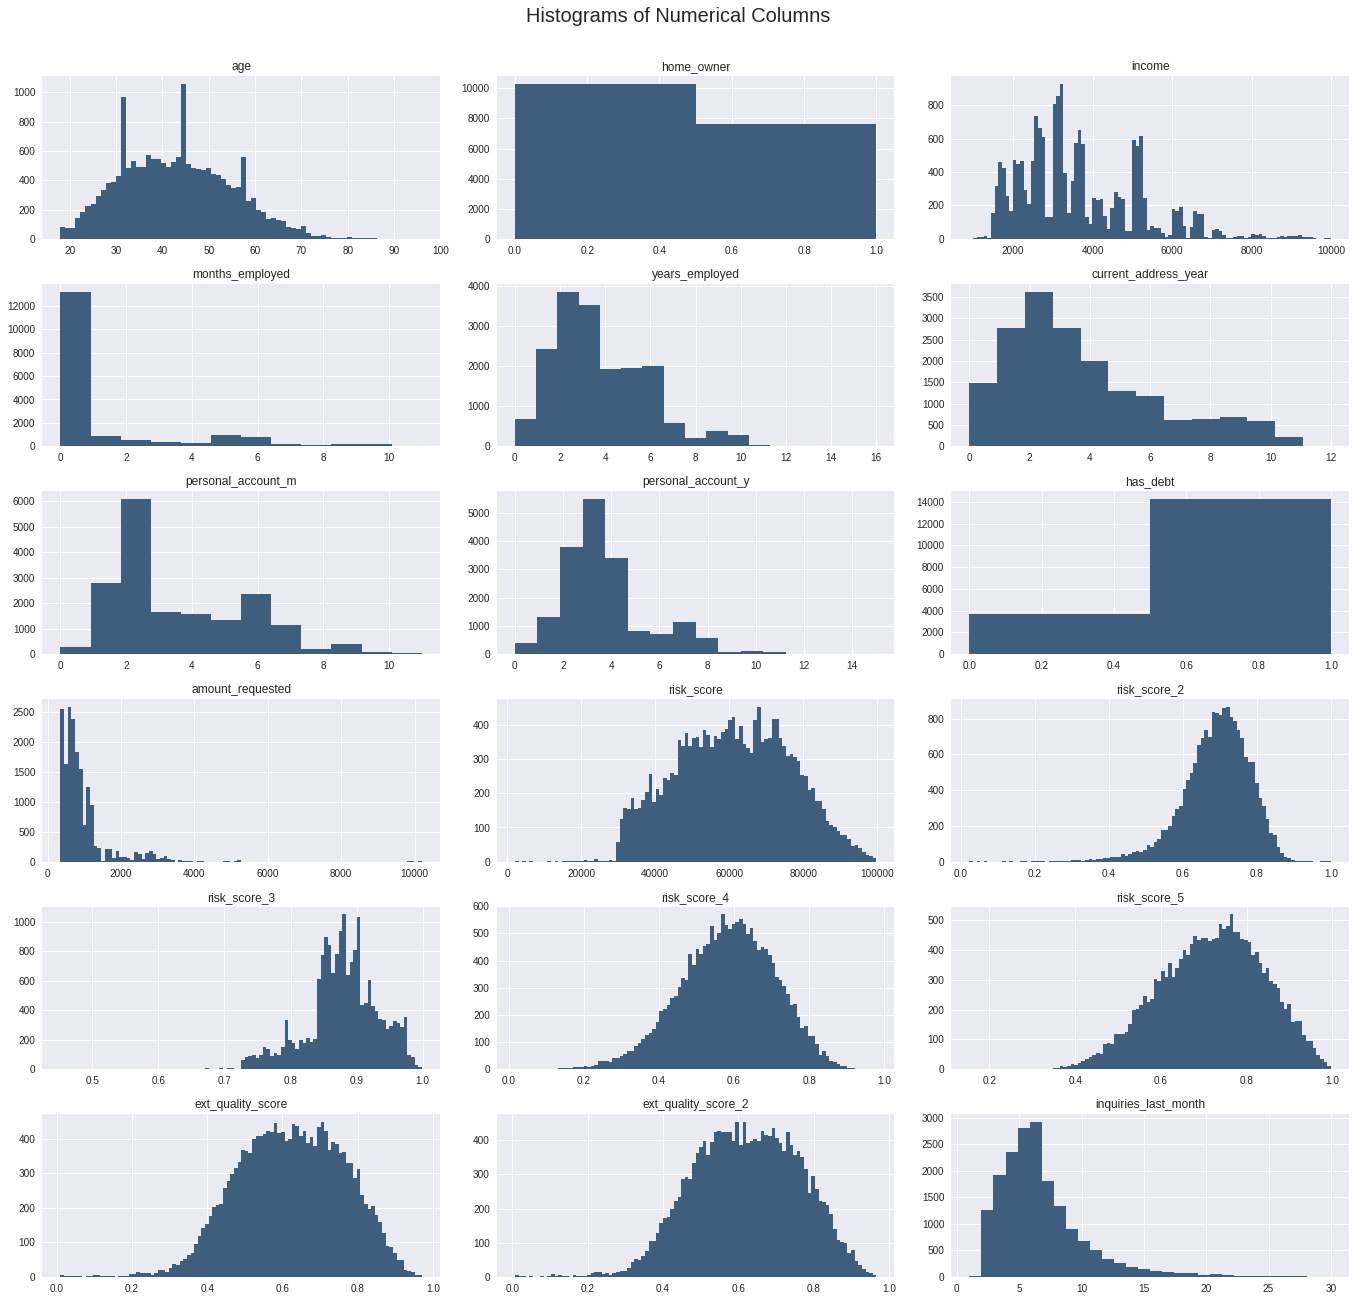

In [8]:
sns.set()
fig = plt.figure(figsize=(19, 19))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(dataset2.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Correlation with Response Variable

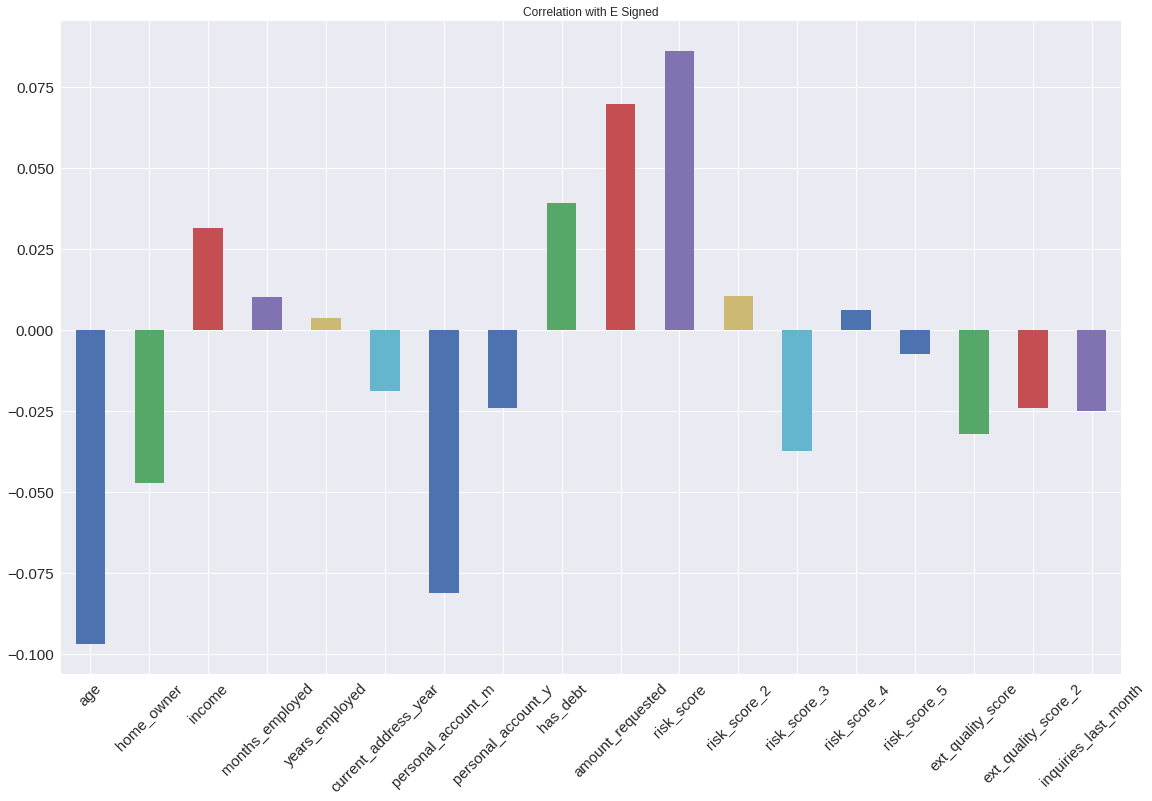

In [9]:
dataset2.corrwith(dataset.e_signed).plot.bar(
        figsize = (19,12), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)

## Correlation Matrix

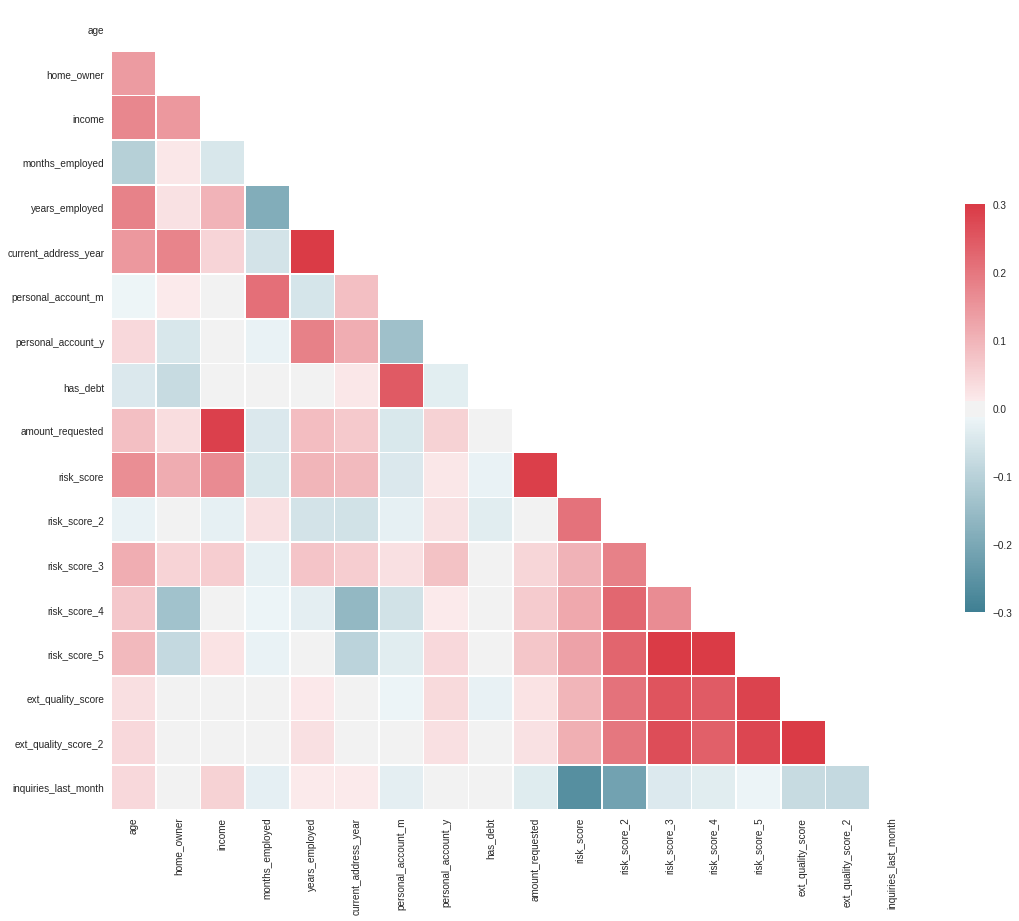

In [10]:
sns.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
df = dataset # Coping the data into df before the model building process

# Model Building

In [0]:
random.seed(100) # setting random seed to 100 

## Data Preprocessing

### Feature Engineering

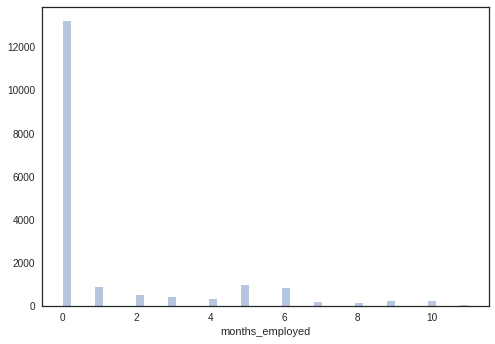

In [13]:
sns.distplot(df.months_employed, kde= False)

*if you see at the distribution, the data is most populated at the 0 which i think is misleading, most of people might have not have months other than years for they have been employed. So I will drop it*

In [0]:
df = df.drop(columns = ['months_employed'])

*Now lets convert the personal_account_y and personal_account_m into total number of months they have been with the bank.*

In [15]:
df['personal_account_months'] = (df.personal_account_m + (df.personal_account_y * 12))
df[['personal_account_m', 'personal_account_y', 'personal_account_months']].head()

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86
4,2,8,98


*Now that we have converted the personal_account_y and personal_account_m and into a single as personal_account_months which represents the total number of months, we can drop the months and year columns*

In [0]:
df = df.drop(columns = ['personal_account_m', 'personal_account_y'])

### One Hot Encoding

In [17]:
df = pd.get_dummies(df)
df.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

*To get out of dummy variable trap we need to remove one column from the encoded data *

In [0]:
df = df.drop(columns = ['pay_schedule_semi-monthly'])

### Removing extra columns

In [0]:
response = df["e_signed"]
users = df['entry_id']
df = df.drop(columns = ["e_signed", "entry_id"])

### Splitting into Train and Test Set

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

### Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [22]:
X_train.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
5957,-0.005991,-0.856349,-0.242358,-1.567782,-0.573557,0.507058,-0.642580,-1.905162,-1.190501,-0.766112,0.979893,-0.229380,-1.060059,-1.057386,1.784494,0.368965,-1.224638,-0.302360,1.976827
16854,-0.509890,-0.856349,-0.052592,0.206559,-0.937970,0.507058,-0.785621,-0.749184,1.254553,0.607772,-0.396208,0.823356,0.041801,-0.672086,-0.663369,-0.280906,-1.224638,3.307315,-0.505861
4429,-0.761840,1.167748,-0.412149,-1.124197,-0.937970,-1.972161,-0.642580,-1.437575,0.532590,-1.485619,-0.086860,-0.775633,0.588358,-0.841550,1.240525,0.195666,0.816568,-0.302360,-0.505861
13607,1.421722,1.167748,-0.638537,0.650144,2.341745,0.507058,-0.785621,-0.680994,-0.642460,1.696278,-1.252980,-1.027524,1.532749,0.817422,-0.119399,2.361903,0.816568,-0.302360,-0.505861
3750,-1.601671,-0.856349,-1.041374,1.093729,2.341745,0.507058,-0.499539,0.780214,-0.248764,-0.315136,-0.910402,0.225551,0.108871,1.541402,-0.935353,-0.150932,0.816568,-0.302360,-0.505861


In [23]:
X_test.head()

,age,home_owner,income,years_employed,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,personal_account_months,pay_schedule_bi-weekly,pay_schedule_monthly,pay_schedule_weekly
3629,-1.013789,-0.856349,-0.242358,-1.124197,-1.302383,0.507058,0.358706,-0.944012,0.548408,-1.076350,0.059153,0.326152,0.314517,-0.399633,0.696555,-0.324231,-1.224638,-0.30236,-0.505861
1820,-1.013789,-0.856349,-0.335577,-0.237027,-1.302383,-1.972161,-0.213457,0.767226,-0.024644,-0.047016,-0.029979,0.641494,-0.781613,-0.063715,-1.207338,0.195666,0.816568,-0.30236,-0.505861
6685,0.245958,-0.856349,-0.598586,2.868070,0.884094,0.507058,0.215665,0.757484,-1.051686,-0.521003,-1.033452,-1.293930,-0.505566,-0.503429,-0.391384,-0.844128,-1.224638,-0.30236,-0.505861
17241,0.329941,-0.856349,0.237051,-0.237027,2.341745,0.507058,2.718881,1.264037,-0.268713,-0.313492,-0.381701,1.167423,-0.616575,0.816657,-0.119399,2.361903,-1.224638,-0.30236,1.976827
8332,-0.509890,1.167748,3.357207,-0.237027,-0.937970,0.507058,2.790402,1.189353,-0.224014,1.102305,0.237540,0.350924,1.006524,1.007200,-0.663369,-1.364025,-1.224638,-0.30236,-0.505861


## Comparing Models

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting Test Set

In [0]:
y_pred = classifier.predict(X_test)

### Evaluating the test set results

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [0]:
results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [28]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351


### SVM (Linear)

In [29]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### Predicting Test Set

In [0]:
y_pred = classifier.predict(X_test)

### Evaluating the test set results

In [0]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [0]:
model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [0]:
results = results.append(model_results, ignore_index = True)

In [34]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354


### SVM (rbf)

In [35]:
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

### Predicting Test Set

In [0]:
y_pred = classifier.predict(X_test)

### Evaluating the test set results

In [0]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [0]:
model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [0]:
results = results.append(model_results, ignore_index = True)

In [40]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505


### RandomForestClassifier with 100 n_estimators

In [41]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting Test Set

In [0]:
y_pred = classifier.predict(X_test)

### Evaluating the test set results

In [0]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [0]:
model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [0]:
results = results.append(model_results, ignore_index = True)

In [46]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n=100),0.621720,0.640098,0.678942,0.658948


### K-fold Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)

In [48]:
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


## Parameter Tuning

### Applying Grid Search

#### Round 1: Entropy

In [0]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

In [0]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1, verbose =1)

In [57]:
%timeit
grid_search = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 39.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 83.5min finished


In [58]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6356275303643725,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

#### Round 2: Entropy

In [0]:
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

In [0]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1, verbose =1)

In [63]:
%timeit
grid_search = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 26.9min finished


In [66]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6356275303643725,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

### Predicting Test Set

In [0]:
y_pred = grid_search.predict(X_test)

### Evaluating the test set results

In [0]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [0]:
model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [0]:
results = results.append(model_results, ignore_index = True)

In [71]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n=100),0.621720,0.640098,0.678942,0.658948
4,"Random Forest (n=100, GSx2 + Entropy)",0.635958,0.646617,0.713693,0.678501


#### Round 1: Gini

In [0]:
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

In [0]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1, verbose= 1)

In [75]:
%timeit
grid_search = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 45.9min finished


In [76]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6363953650705012,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

#### Round 2: Gini

In [0]:
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

In [0]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1, verbose= 1)

In [79]:
%timeit
grid_search = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 23.5min finished


In [80]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.6386988691888873,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 12,
  'min_samples_leaf': 12,
  'min_samples_split': 2})

### Predicting Test Set

In [0]:
y_pred = grid_search.predict(X_test)

### Evaluating the test set results

In [0]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [0]:
model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [0]:
results = results.append(model_results, ignore_index = True)

In [85]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.561977,0.575963,0.705913,0.634351
1,SVM (Linear),0.568398,0.577769,0.735996,0.647354
2,SVM (RBF),0.591569,0.605730,0.690871,0.645505
3,Random Forest (n=100),0.621720,0.640098,0.678942,0.658948
4,"Random Forest (n=100, GSx2 + Entropy)",0.635958,0.646617,0.713693,0.678501
5,"Random Forest (n=100, GSx2 + Gini)",0.635399,0.649376,0.701245,0.674314


*So, Random forest with entropy is the best fitted and we are going to use it and our best hyperparameters look like:
{'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 10}*

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0,bootstrap=True, max_depth=None, max_features=5, min_samples_leaf=1, min_samples_split=10, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

### Confusion Matrix

Test Data Accuracy: 0.6360


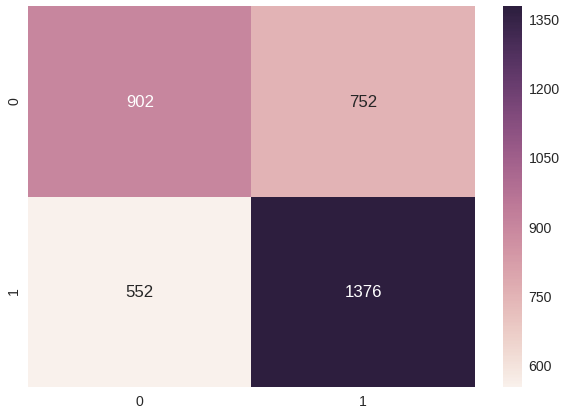

In [89]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## End of Model

# Formatting Final Results

In [0]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]

In [91]:
final_results

,entry_id,e_signed,predictions
8,6493191,1.0,1
9,8908605,1.0,1
12,6889184,1.0,0
16,9375601,0.0,1
18,8515555,1.0,1
31,2881357,0.0,0
33,7048193,1.0,1
37,5815308,1.0,1
44,8700190,1.0,1
45,8232654,0.0,0


---
---
